In [1]:
import pandas as pd
import math, os, sys, glob
import numpy as np
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
mpl.rcParams['figure.dpi'] = 500
pd.set_option('display.max_columns', 1000)
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
stop_words_eng = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

### Load Data

In [3]:
f = open('../data/input.txt', 'r', encoding="utf8")
data = f.read()
f.close()

# Save temporary value
data = data.splitlines()
data_copy = data.copy()

In [4]:
data[:10]

['24/01/16, 12:25 pm - Kartheek Palepu: ,🐶',
 '25/01/16, 9:39 am - Kartheek Palepu: Na kodaka tega tirgtnavga 😝',
 'Basket ball a? Emana ardam aindq😂',
 '25/01/16, 9:59 am - Kinetic USA: Hehe ardamavdanki emundi ra',
 '25/01/16, 9:59 am - Kinetic USA: I know kada',
 '25/01/16, 9:59 am - Kinetic USA: 😝😝',
 '25/01/16, 10:00 am - Kartheek Palepu: Hehehe ne bonda ra ne bonda',
 '25/01/16, 10:00 am - Kartheek Palepu: Sunil anattu antav..okkodiki okko ball ivvachga ani',
 '25/01/16, 10:01 am - Kinetic USA: Ssshhhuuu',
 '25/01/16, 10:01 am - Kinetic USA: Naa talent gurinchi ardam kaatle niku']

### Clean data

1. If a line doesn't have timestamp and user name, append it from previous line
2. If the line has "Messages to this chat and calls are now secured with end-to-end encryption", Remove it

In [5]:
def add_timestamp(current_line, previous_line):
    previous_line_ts = previous_line.split('-')[0].strip()
    previous_line_name = previous_line.split('-')[1].strip().split(':')[0].strip()
    current_line = previous_line_ts + " - " + previous_line_name + ": " + current_line
    return current_line

In [6]:
data = data_copy.copy()
for idx, line in enumerate(data):
    split_part = line.split('-')
    if len(split_part) == 0:
        print(f'== Before Condition 1: {data[idx]}')
        data[idx] = add_timestamp(data[idx], data[idx-1])
        print(f'== After Condition 1: {data[idx-1]}')
        print(f'== After Condition 1: {data[idx]}')
    else:
        split_part = split_part[0].strip()
        split_part = split_part.split(",")
        if len(split_part) < 2:
            print(f'== Before Condition 2: {data[idx]}')
            data[idx] = add_timestamp(data[idx], data[idx-1])
            print(f'== After Condition 2: {data[idx-1]}')
            print(f'== After Condition 2: {data[idx]}')
        else:
            split_part = split_part[1].strip()
            split_part = split_part.split(" ")
            if len(split_part) < 2:
                print(f'== Before Condition 3: {data[idx]}')
                data[idx] = add_timestamp(data[idx], data[idx-1])
                print(f'== After Condition 3: {data[idx-1]}')
                print(f'== After Condition 3: {data[idx]}')
            else:
                split_part = split_part[1].strip()
                if split_part != 'am' and split_part != 'pm':
                    print(f'== Before Condition 4: {data[idx]}')
                    data[idx] = add_timestamp(data[idx], data[idx-1])
                    print(f'== After Condition 4: {data[idx-1]}')
                    print(f'== After Condition 4: {data[idx]}')
                else:
                    'No correction needed'

data = [line for line in data if 'Messages to this chat and calls are now secured with end-to-end encryption' not in line]

== Before Condition 2: Basket ball a? Emana ardam aindq😂
== After Condition 2: 25/01/16, 9:39 am - Kartheek Palepu: Na kodaka tega tirgtnavga 😝
== After Condition 2: 25/01/16, 9:39 am - Kartheek Palepu: Basket ball a? Emana ardam aindq😂
== Before Condition 2: (Nv unnav ani kaknda)
== After Condition 2: 05/02/16, 9:38 am - Kartheek Palepu: Emanna precautions😜
== After Condition 2: 05/02/16, 9:38 am - Kartheek Palepu: (Nv unnav ani kaknda)
== Before Condition 2: Monna ssis ssrs annadu
== After Condition 2: 05/02/16, 11:59 am - Kartheek Palepu: Certfctns modalettaduraa..
== After Condition 2: 05/02/16, 11:59 am - Kartheek Palepu: Monna ssis ssrs annadu
== Before Condition 2: Ninna tableau
== After Condition 2: 05/02/16, 11:59 am - Kartheek Palepu: Monna ssis ssrs annadu
== After Condition 2: 05/02/16, 11:59 am - Kartheek Palepu: Ninna tableau
== Before Condition 2: Repu hadoop
== After Condition 2: 05/02/16, 11:59 am - Kartheek Palepu: Ninna tableau
== After Condition 2: 05/02/16, 11:59 a

== After Condition 2: 16/02/17, 10:19 am - Kartheek Palepu: Free ey
== Before Condition 2: 
== After Condition 2: 19/02/17, 12:28 pm - Kartheek Palepu: Msg receive avvagane switch off ayye cell phones 100 lo 2
== After Condition 2: 19/02/17, 12:28 pm - Kartheek Palepu: 
== Before Condition 2: Ante probability 0.02
== After Condition 2: 19/02/17, 12:28 pm - Kartheek Palepu: 
== After Condition 2: 19/02/17, 12:28 pm - Kartheek Palepu: Ante probability 0.02
== Before Condition 2: Savngs - 0511455184
== After Condition 2: 21/02/17, 4:27 am - Kartheek Palepu: Bank - Kotak
== After Condition 2: 21/02/17, 4:27 am - Kartheek Palepu: Savngs - 0511455184
== Before Condition 2: Name - Kartheek Palepu
== After Condition 2: 21/02/17, 4:27 am - Kartheek Palepu: Savngs - 0511455184
== After Condition 2: 21/02/17, 4:27 am - Kartheek Palepu: Name - Kartheek Palepu
== Before Condition 2: IFSC - Kkbk0000431-indiranagar bangalore
== After Condition 2: 21/02/17, 4:27 am - Kartheek Palepu: Name - Kartheek P

In [7]:
clean_data = "\n".join(data)
f = open('../data/clean_input.txt', 'w', encoding = "utf-8")
f.write(clean_data)
f.close()

### Process the data into DataFrame

In [8]:
data[0]

'24/01/16, 12:25 pm - Kartheek Palepu: ,🐶'

In [9]:
timestamps = []
users = []
messages = []
for line in data:
    timestamps.append(line.split("-")[0].strip())
    sub_line = line.split("-")[1].strip().split(":")
    users.append(sub_line[0].strip())
    messages.append("-".join([v.strip() for v in sub_line[1:]]))

In [10]:
pd_data = pd.DataFrame({'Timestamp': timestamps, 'User': users, 'Message': messages})[['Timestamp', 'User', 'Message']]

In [11]:
pd_data['Timestamp'] = pd.to_datetime(pd_data['Timestamp'])
pd_data['Date'] = pd_data['Timestamp'].dt.strftime('%d-%m-%Y')
pd_data['Weekday'] = pd_data['Timestamp'].dt.strftime('%a')

In [12]:
pd_data

,Timestamp,User,Message,Date,Weekday
0,2016-01-24 12:25:00,Kartheek Palepu,",🐶",24-01-2016,Sun
1,2016-01-25 09:39:00,Kartheek Palepu,Na kodaka tega tirgtnavga 😝,25-01-2016,Mon
2,2016-01-25 09:39:00,Kartheek Palepu,Basket ball a? Emana ardam aindq😂,25-01-2016,Mon
3,2016-01-25 09:59:00,Kinetic USA,Hehe ardamavdanki emundi ra,25-01-2016,Mon
4,2016-01-25 09:59:00,Kinetic USA,I know kada,25-01-2016,Mon
5,2016-01-25 09:59:00,Kinetic USA,😝😝,25-01-2016,Mon
6,2016-01-25 10:00:00,Kartheek Palepu,Hehehe ne bonda ra ne bonda,25-01-2016,Mon
7,2016-01-25 10:00:00,Kartheek Palepu,Sunil anattu antav..okkodiki okko ball ivvachg...,25-01-2016,Mon
8,2016-01-25 10:01:00,Kinetic USA,Ssshhhuuu,25-01-2016,Mon
9,2016-01-25 10:01:00,Kinetic USA,Naa talent gurinchi ardam kaatle niku,25-01-2016,Mon


### Start Analysis

#### Userwise
- Total messages
- Total Words
- Unique words
- Most said word/count
- First message day
- Recent message day
- Most active day (with # of messages)
- Least active day (not first/recent)
- Avg. response time (min):

#### Totals
- Total days
- Total messages
- Total words
- Total Emojis
- Total Links shared
- Screen touches (Counts all characters including spaces)

#### Averages
- Messages/day
- Emojis/day
- Links/day
- Words/message
- Letters/word

#### Tops
- Most active day (together)
    - N Messages
    - N Emojis
    - N Words
- Longest conversation
    - N Messages
    - N Emojis
    - N Words
    - Duration (min)

#### Plots
- Top 20 words used with count (bar plot, per user)
    - Both small words and long words
- Timeline of number of texts (day wise, colored by user)
- Weekday number of texts (bar plot)
- Media (pie chart)
- Avg. Words per text (timeline)
- Avg. Emojis per text (timeline)

In [13]:
pd_data['Message']

0                                                       ,🐶
1                              Na kodaka tega tirgtnavga 😝
2                        Basket ball a? Emana ardam aindq😂
3                              Hehe ardamavdanki emundi ra
4                                              I know kada
5                                                       😝😝
6                              Hehehe ne bonda ra ne bonda
7        Sunil anattu antav..okkodiki okko ball ivvachg...
8                                                Ssshhhuuu
9                    Naa talent gurinchi ardam kaatle niku
10                                             Vaddu baboi
11                        Ala kaadu ani velli aadochuntaav
12                                       Ammo endhi aadedi
13                                  Savakodutunnaru vaallu
14                      Hahaha..nv general ga opkovv ga ra
15                       Haha professional players kada ra
16                                  Andukani lyt teeskun

In [12]:
# Most said word/count
# Most active day
# Avg. response time (min):

pd_message_ct = pd_data.groupby(['User'])['Message'].count().reset_index()
print(pd_message_ct)

              User  Message
0  Kartheek Palepu     6077
1      Kinetic USA     4563


In [13]:
users = []
n_words = []
n_unique_words = []
for each_user in np.unique(pd_data['User']):
    message = " ".join(pd_data[(pd_data['User'] == each_user) & (pd_data['Message'] != "<Media omitted>")]['Message'].tolist())
    words = message.split(" ")
    n_words.append(len(words))
    n_unique_words.append(len(set(words)))
    users.append(each_user)
    
pd_word_ct = pd.DataFrame({'User': users, 'Number of Words': n_words, 'Number of unique words': n_unique_words})
pd_word_ct = pd_word_ct[['User', 'Number of Words', 'Number of unique words']]
pd_word_ct

,User,Number of Words,Number of unique words
0,Kartheek Palepu,20505,8637
1,Kinetic USA,15718,5483


In [ ]:
for each_user in np.unique(pd_data['User']):
    message = " ".join(pd_data[(pd_data['User'] == each_user) & (pd_data['Message'] != "<Media omitted>")]['Message'].tolist())
    words = message.split(" ")
    clean_words = []
    for word in words:
        if word not in stop_words_eng:
            clean_words.append(word)
    pd_clean_words = pd.DataFrame({"Words": clean_words, "Index": np.arange(len(clean_words))})
    pd_word_ct = pd_clean_words.groupby("Words")["Index"].count().reset_index()
    pd_word_ct.rename(columns = {'Index': 'Count'}, inplace = True)
    pd_t20_word_ct = pd_word_ct.sort_values(['Count'], ascending = False).iloc[:20]

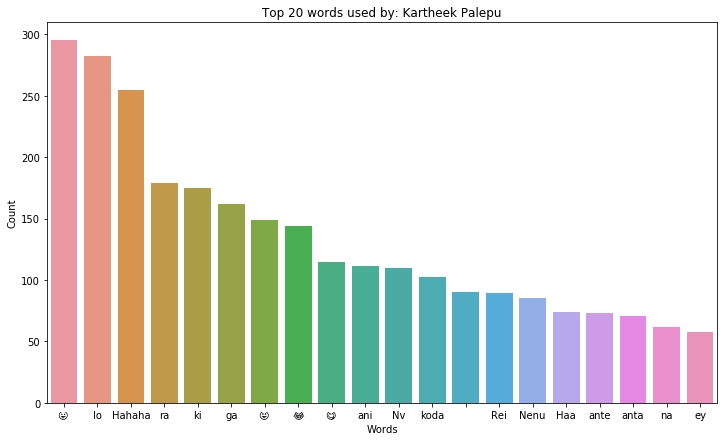

In [23]:
for each_user in np.unique(pd_data['User']):
    message = " ".join(pd_data[(pd_data['User'] == each_user) & (pd_data['Message'] != "<Media omitted>")]['Message'].tolist())
    words = message.split(" ")
    clean_words = []
    for word in words:
        if word not in stop_words_eng:
            clean_words.append(word)
    pd_clean_words = pd.DataFrame({"Words": clean_words, "Index": np.arange(len(clean_words))})
    pd_word_ct = pd_clean_words.groupby("Words")["Index"].count().reset_index()
    pd_word_ct.rename(columns = {'Index': 'Count'}, inplace = True)
    pd_t20_word_ct = pd_word_ct.sort_values(['Count'], ascending = False).iloc[:20]
    plt.figure(figsize = (12, 7))
    g = sns.barplot(x = "Words", y = "Count", data = pd_t20_word_ct)
    g.set_title('Top 20 words used by: ' + each_user)
    break